---
title: "Example Notebooks of Poincare Map" \
author: "Naoya Ozaki" \
date: "04 January 2024" \
output: "poincare_map"

---

In [1]:
using LinearAlgebra

# Definition of Equation of Motion of Planar CRTBP
function eom_pcrtbp!(dx, x, μ, t)
    # Preparation
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    a_cori = [2.0x[4], -2.0x[3]]
    a_cf = [x[1], x[2]]
    # dx/dt
    dx[1:2] = x[3:4]
    dx[3:4] = -(1.0 - μ) * r1 / (norm(r1)^3) - μ * r2 / (norm(r2)^3) + a_cori + a_cf
end

eom_pcrtbp! (generic function with 1 method)

In [2]:
using DifferentialEquations

function condition(x, t, integrator) # Event when event_f(u,t) == 0
    r1_vec = x[1:2] + [μ,0]
    return r1_vec ⋅ x[3:4]
end

function affect!(integrator)
    nothing
end

function condition2(x, t, integrator) # Event when event_f(u,t) == 0
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    return norm(r1) > 1.0e-3 && norm(r2) > 1.0e-3
end

affect2!(integrator) = terminate!(integrator)

cb = ContinuousCallback(condition, nothing, affect!, save_positions=(true, false))
cb2 = ContinuousCallback(condition2, affect2!, save_positions=(false, false))
cbs = CallbackSet(cb, cb2)

CallbackSet{Tuple{ContinuousCallback{typeof(condition), Nothing, typeof(affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}, ContinuousCallback{typeof(condition2), typeof(affect2!), typeof(affect2!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}}, Tuple{}}((ContinuousCallback{typeof(condition), Nothing, typeof(affect!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}(condition, nothing, affect!, SciMLBase.INITIALIZE_DEFAULT, SciMLBase.FINALIZE_DEFAULT, nothing, SciMLBase.LeftRootFind, 10, Bool[1, 0], 1, 2.220446049250313e-15, 0, 1//100), ContinuousCallback{typeof(condition2), typeof(affect2!), typeof(affect2!), typeof(SciMLBase.INITIALIZE_DEFAULT), typeof(SciMLBase.FINALIZE_DEFAULT), Float64, Int64, Rational{Int64}, Nothing, Int64}(condition2, affect2!, aff

In [3]:
jacobi_constant = 3.0
μ = 0.01215058426994 #5.667e-5 #0.01215058426994
qx0 = 1.1 + 5.0e-3*rand()
theta0 = 2.0 * pi * rand()
p0 = sqrt(-jacobi_constant + qx0^2 + 2.0 * (1.0 - μ) / abs(qx0 + μ) + 2.0 * μ / abs(qx0 - 1.0 + μ) + μ*(1.0-μ))
x0 = [qx0, 0.0, p0 * cos(theta0), p0 * sin(theta0)]
tspan = (0.0, 20.0*pi)
prob = ODEProblem(eom_pcrtbp!, x0, tspan, μ)
sol = solve(prob, Vern7(), callback=cbs, reltol=1e-10, abstol=1e-10, saveat=[-200.0 * pi, 0.0, 200.0 * pi])
sol_forplot = solve(prob, Vern7(), callback=cbs, reltol=1e-10, abstol=1e-10)

retcode: Success
Interpolation: specialized 7th order lazy interpolation
t: 574-element Vector{Float64}:
  0.0
  0.01682030271426436
  0.030235335368446484
  0.04789132942991972
  0.06574788104031186
  0.08620787584872065
  0.1080879764383953
  0.13220711819104766
  0.1583042585109506
  0.18674057593428878
  ⋮
 61.86621057107807
 61.99742302342065
 62.129173939719756
 62.26198750035477
 62.39600609178272
 62.53145783213917
 62.66837112458806
 62.80660608269859
 62.83185307179586
u: 574-element Vector{Vector{Float64}}:
 [1.1022191995410557, 0.0, 0.3776006470640427, -0.26403802351318056]
 [1.1084120470643208, -0.004544717004519536, 0.3589927358786424, -0.27615813279220547]
 [1.113133954122691, -0.008309857088424504, 0.34511086200423075, -0.28507025061029145]
 [1.1190740251317293, -0.013440239318875549, 0.32795317536767976, -0.2959237377203602]
 [1.1247835970015811, -0.018815792553461226, 0.31171251755636936, -0.30602131377986785]
 [1.1309809166629312, -0.025187343535605533, 0.29428022696

In [4]:
x_all = hcat(sol.u...)'

r_1 = sqrt.((x_all[:, 1] .+ μ) .^ 2 + x_all[:, 2] .^ 2)
k_ene = 0.5 * ((x_all[:, 3] - x_all[:, 2]) .^ 2 + (x_all[:, 4] + x_all[:, 1] .+ μ) .^ 2)
a = -0.5 ./ (k_ene .- 1 ./ r_1)
theta = atan.(x_all[:, 2],x_all[:, 1] .+ μ)
# v_r = x_all[:, 3].*cos.(theta) + x_all[:,4].*sin.(theta)
# v_t = r_1 - x_all[:, 3] .* sin.(theta) + x_all[:, 4] .* cos.(theta)
# a = (r_1.*(1-μ))./(2*(1-μ) .- r_1.*(v_r.^2+v_t.^2))

7-element Vector{Float64}:
  0.0
 -0.4170598617284252
 -1.7252525004377441
 -2.47789947120895
 -2.368968726889783
 -1.536135004194858
 -2.419113739219058

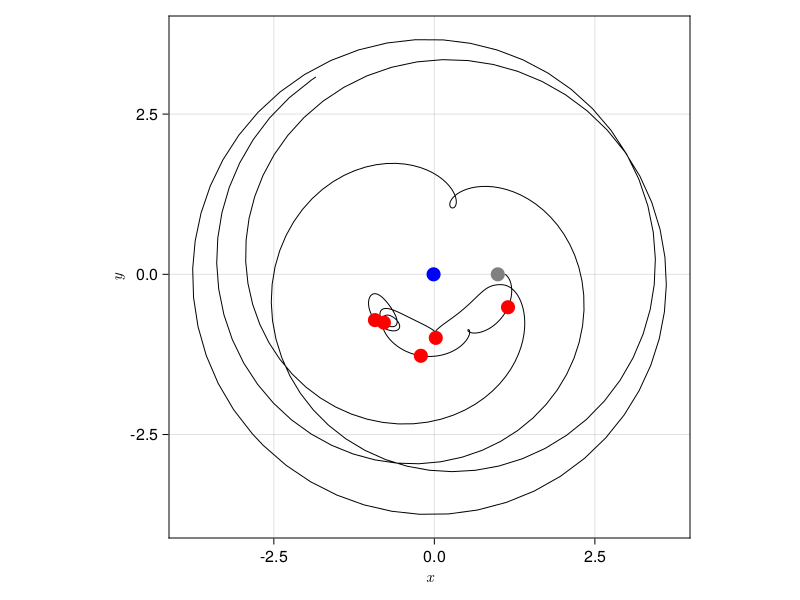

In [5]:
using CairoMakie
Makie.inline!(true)

fig = Figure()
ax = Axis(fig[1, 1]; xlabel=L"x", ylabel=L"y")
scatter!(-μ, 0.0; markersize=20, color=:blue)
scatter!(1.0 - μ, 0.0; markersize=20, color=:gray)
lines!(sol_forplot[1, :], sol_forplot[2, :]; linewidth=1, color=:black)
scatter!(sol[1, 2:end-1], sol[2, 2:end-1]; markersize=20, color=:red)
ax.aspect = DataAspect()
fig

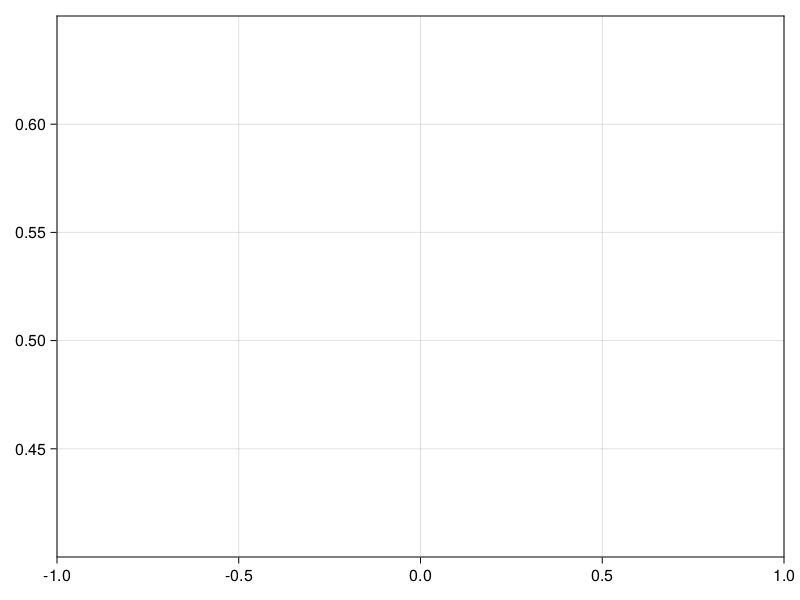

In [6]:
using CairoMakie

fig = Figure()
ax = Axis(fig[1, 1])
scatter!(theta[2:end-1] / pi, a[2:end-1], color=:black, markersize=2)
xlims!(-1, 1)
# ylims!(1.1, 1.8)
ylims!(0.4, 0.65)
fig

# 2. `EnsembleProblem`による並列計算の実行

In [7]:
using Distributed
using DifferentialEquations

addprocs(exeflags="--project=$(Base.active_project())")
@everywhere using DifferentialEquations
@everywhere using LinearAlgebra

@everywhere μ = 0.01215058426994 #5.667e-5 #0.01215058426994
num_trj = 10000

25000

In [8]:
@everywhere t_fin = 2.0 * pi * 200
tspan = (0.0, t_fin)
prob = ODEProblem(eom_pcrtbp!, x0, tspan, μ)

# Definition of Equation of Motion of Planar CRTBP
@everywhere function eom_pcrtbp!(dx, x, μ, t)
    # Preparation
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    a_cori = [2.0x[4], -2.0x[3]]
    a_cf = [x[1], x[2]]
    # dx/dt
    dx[1:2] = x[3:4]
    dx[3:4] = -(1.0 - μ) * r1 / (norm(r1)^3) - μ * r2 / (norm(r2)^3) + a_cori + a_cf
end

@everywhere function prob_func(prob, i, repeat)
    jacobi_constant = 3.0
    qx0 = 1.2rand() #1.1 + 5.0e-3 * rand()
    theta0 = 2.0 * pi * rand()
    p0 = sqrt(-jacobi_constant + qx0^2 + 2.0 * (1.0 - μ) / abs(qx0 + μ) + 2.0 * μ / abs(qx0 - 1.0 + μ) + μ * (1.0 - μ))
    x0 = [qx0, 0.0, p0 * cos(theta0), p0 * sin(theta0)]
    remake(prob, u0=x0)
end

@everywhere function condition(x, t, integrator) # Event when event_f(u,t) == 0
    r1_vec = x[1:2] + [μ,0.0]
    return r1_vec ⋅ x[3:4]
end

@everywhere function affect!(integrator)
    nothing
end

@everywhere function condition2(x, t, integrator) # Event when event_f(u,t) == 0
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    return norm(r1) > 1.0e-3 && norm(r2) > 1.0e-3
end

@everywhere affect2!(integrator) = terminate!(integrator)

cb = ContinuousCallback(condition, nothing, affect!, save_positions=(true, false))
cb2 = ContinuousCallback(condition2, affect2!, save_positions=(false, false))
cbs = CallbackSet(cb, cb2)

ensemble_prob = EnsembleProblem(prob, prob_func=prob_func)
sim = solve(ensemble_prob, Vern7(), EnsembleDistributed(), trajectories=num_trj, callback=cbs, saveat=t_fin)

EnsembleSolution Solution of length 25000 with uType:
ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Float64, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Float64, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{

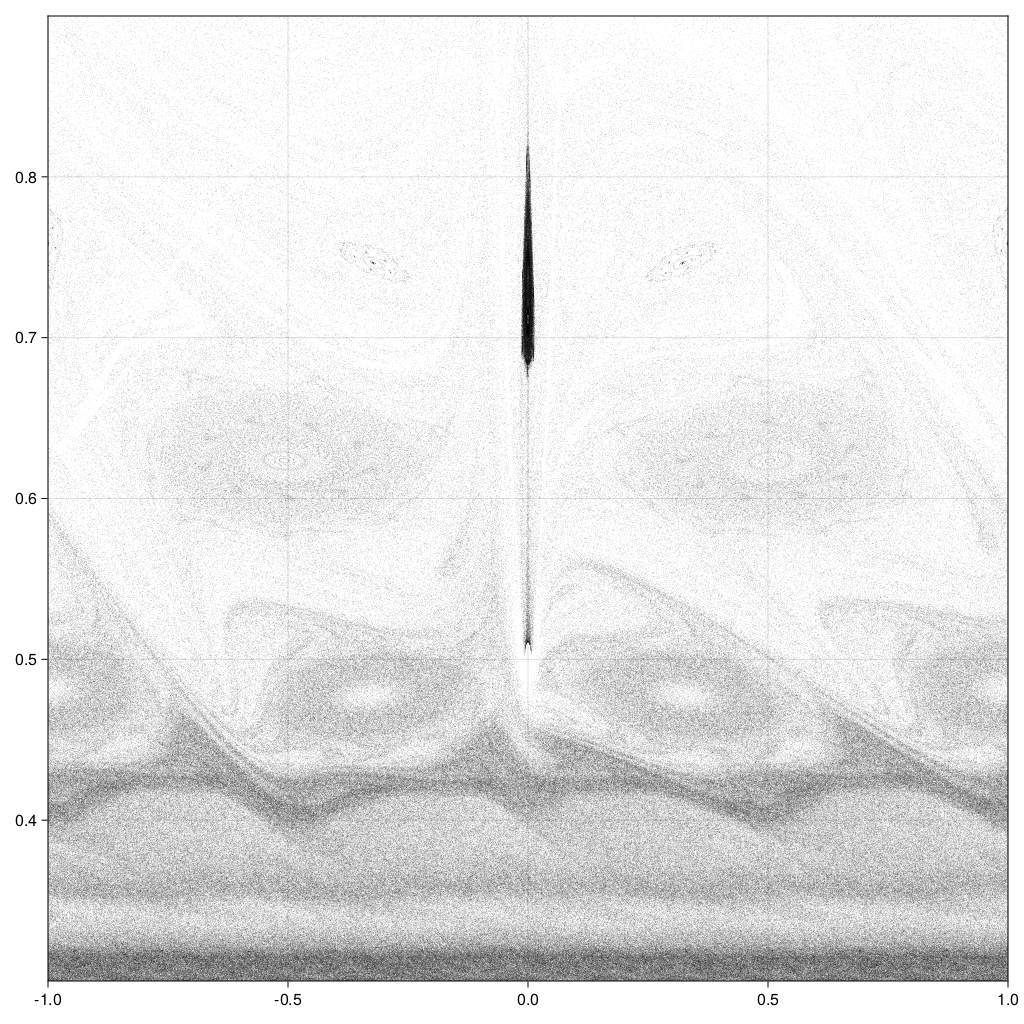

In [9]:
using CairoMakie

fig = Figure(; resolution=(1024, 1024))
ax = Axis(fig[1, 1])

for n = 1:num_trj
    x_all = hcat(sim[n].u...)'

    r_1 = sqrt.((x_all[:, 1] .+ μ) .^ 2 + x_all[:, 2] .^ 2)
    k_ene = 0.5 * ((x_all[:, 3] - x_all[:, 2]) .^ 2 + (x_all[:, 4] + x_all[:, 1] .+ μ) .^ 2)
    a = -0.5 ./ (k_ene .- 1.0 ./ r_1)
    theta = atan.(x_all[:, 2],x_all[:, 1] .+ μ)

    scatter!(theta[2:end-1] / pi, a[2:end-1], color=:black, markersize=0.5)
end

xlims!(-1.0, 1.0)
# ylims!(1.1, 1.8)
ylims!(0.3, 0.9)
fig

In [10]:
# Negative Time Propagation
@everywhere t_fin = -2.0 * pi * 200
tspan = (0.0, t_fin)
prob = ODEProblem(eom_pcrtbp!, x0, tspan, μ)

# Definition of Equation of Motion of Planar CRTBP
@everywhere function eom_pcrtbp!(dx, x, μ, t)
    # Preparation
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    a_cori = [2.0x[4], -2.0x[3]]
    a_cf = [x[1], x[2]]
    # dx/dt
    dx[1:2] = x[3:4]
    dx[3:4] = -(1.0 - μ) * r1 / (norm(r1)^3) - μ * r2 / (norm(r2)^3) + a_cori + a_cf
end

@everywhere function prob_func(prob, i, repeat)
    jacobi_constant = 3.0
    qx0 = 1.2rand() #1.1 + 5.0e-3 * rand()
    theta0 = 2.0 * pi * rand()
    p0 = sqrt(-jacobi_constant + qx0^2 + 2.0 * (1.0 - μ) / abs(qx0 + μ) + 2.0 * μ / abs(qx0 - 1.0 + μ) + μ * (1.0 - μ))
    x0 = [qx0, 0.0, p0 * cos(theta0), p0 * sin(theta0)]
    remake(prob, u0=x0)
end

@everywhere function condition(x, t, integrator) # Event when event_f(u,t) == 0
    r1_vec = x[1:2] + [μ, 0.0]
    return r1_vec ⋅ x[3:4]
end

@everywhere function affect!(integrator)
    nothing
end

@everywhere function condition2(x, t, integrator) # Event when event_f(u,t) == 0
    r1 = x[1:2] + [μ, 0.0]
    r2 = x[1:2] - [1.0 - μ, 0.0]
    return norm(r1) > 1.0e-3 && norm(r2) > 1.0e-3
end

@everywhere affect2!(integrator) = terminate!(integrator)

cb = ContinuousCallback(condition, affect!, nothing, save_positions=(true, false))
cb2 = ContinuousCallback(condition2, affect2!, save_positions=(false, false))
cbs = CallbackSet(cb, cb2)

ensemble_prob = EnsembleProblem(prob, prob_func=prob_func)
sim = solve(ensemble_prob, Vern7(), EnsembleDistributed(), trajectories=num_trj, callback=cbs, saveat=t_fin)

EnsembleSolution Solution of length 25000 with uType:
ODESolution{Float64, 2, Vector{Vector{Float64}}, Nothing, Nothing, Vector{Float64}, Vector{Vector{Vector{Float64}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Float64, ODEFunction{true, SciMLBase.AutoSpecialize, FunctionWrappersWrappers.FunctionWrappersWrapper{Tuple{FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{Float64}, Vector{Float64}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Float64, Float64}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}, Vector{Float64}, Float64, ForwardDiff.Dual{ForwardDiff.Tag{DiffEqBase.OrdinaryDiffEqTag, Float64}, Float64, 1}}}, FunctionWrappers.FunctionWrapper{Nothing, Tuple{

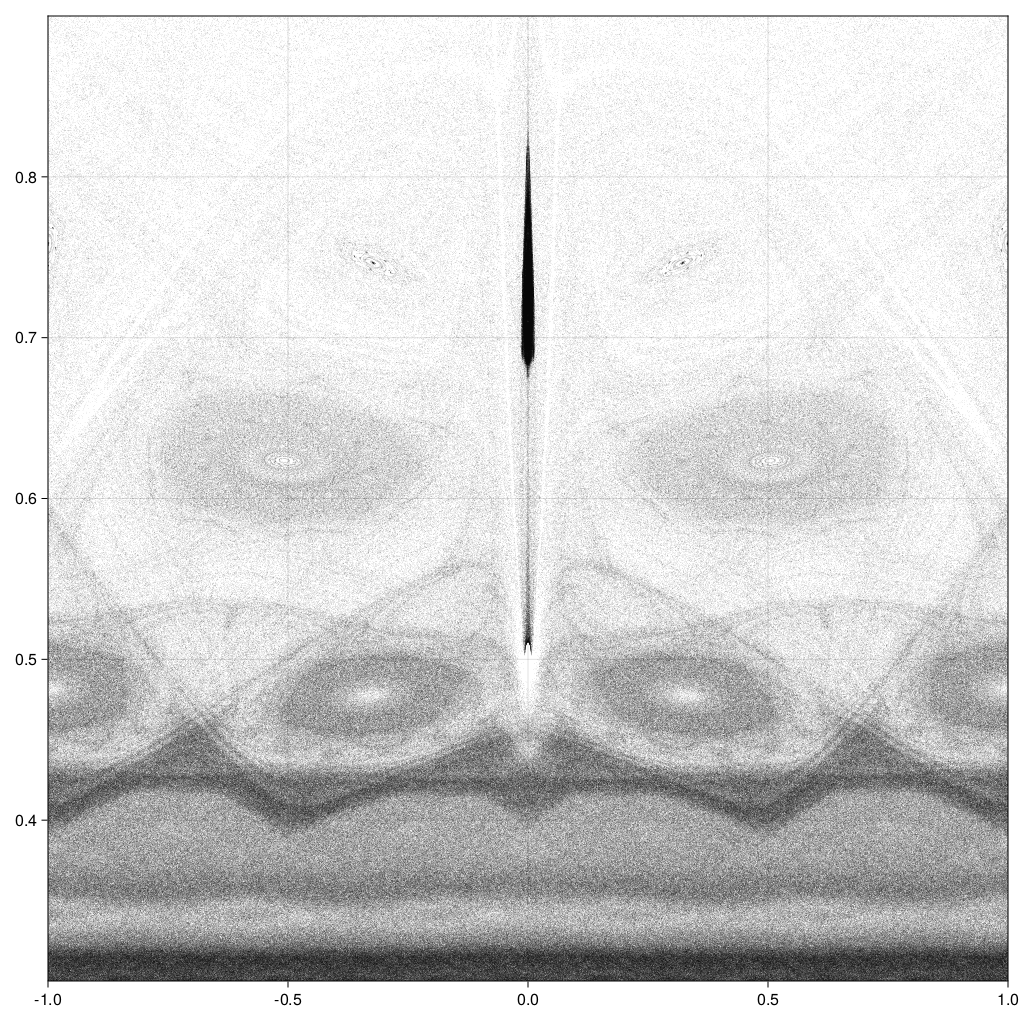

In [11]:
for n = 1:num_trj
    x_all = hcat(sim[n].u...)'

    r_1 = sqrt.((x_all[:, 1] .+ μ) .^ 2 + x_all[:, 2] .^ 2)
    k_ene = 0.5 * ((x_all[:, 3] - x_all[:, 2]) .^ 2 + (x_all[:, 4] + x_all[:, 1] .+ μ) .^ 2)
    a = -0.5 ./ (k_ene .- 1.0 ./ r_1)
    theta = atan.(x_all[:, 2],x_all[:, 1] .+ μ)

    scatter!(theta[2:end-1] / pi, a[2:end-1], color=:black, markersize=0.5)
end

xlims!(-1.0, 1.0)
# ylims!(1.1, 1.8)
ylims!(0.3, 0.9)
# ylims!(0.4, 0.65)
fig